<a href="https://colab.research.google.com/github/BrunoTASilva/project-degree-ds/blob/main/Projeto_Dataviz(base).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SOMENTE O ITEM 1 É OBRIGATÓRIO PARA APRESENTAÇÃO!

# História das Olimpíadas - Parte 2
_(créditos ao prof. Rafael Moreira)_

Você recentemente trabalhou (ou está trabalhando) em uma análise de dados históricos dos jogos olímpicos utilizando o Pandas para auxiliá-lo.

Desde que você iniciou seus trabalhos nesse projeto, novas ferramentas bastante poderosas foram ensinadas! O seu papel agora será utilizar essas novas ferramentas para gerar algumas visualizações que tornarão certas informações muito mais claras.

Utilize qualquer uma das bibliotecas estudadas (```matplotlib```, ```seaborn``` e ```plotly```) para realizar as atividades propostas. Não há problema em usar apenas uma para realizar todas as atividades, nem em utilizar cada uma delas em uma atividade diferente - siga suas preferências pessoais!

Utilize os (muitos) parâmetros permitidos por cada função e/ou atributos dos objetos fornecidos pelas bibliotecas para criar uma identidade visual coesa para ser utilizada em todo o projeto. Use títulos, legendas e rótulos nos eixos para deixar os gráficos verdadeiramente informativos. E não se esqueça que a simples escolha das cores a serem utilizadas pode tornar os gráficos ainda mais interessantes!

Você utilizará o mesmo dataset fornecido no projeto anterior. Não há problemas em reaproveitar códigos do projeto anterior para economizar tempo e focar seus esforços na geração dos gráficos.

Para começar, importe o Pandas e carregue o arquivo ```athlete_events.csv``` fornecido no projeto anterior.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import plotly.express as px
from google.colab import drive
drive.mount('/content/drive')

arquivo = '/content/drive/MyDrive/LetsCode/Projetos/Projeto5_Pandas/athlete_events.csv'
athlete_events = pd.read_csv(arquivo,sep=",")
df = athlete_events.set_index("ID")
df.head()

Mounted at /content/drive


,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


## 1. O Brasil nas Olimpíadas

Vamos começar filtrando novamente os dados que iremos trabalhar. Crie um DataFrame contendo apenas informações sobre atletas **medalhistas** brasileiros.

In [3]:
dfMedal = df.loc[df.Medal.notna()]
dfBrazilMedal = dfMedal.loc[dfMedal.Team == 'Brazil']
dfBrazilMedal



,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
ID,,,,,,,,,,,,,,
918,Ademir Roque Kaefer,M,24.0,179.0,74.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Football,Football Men's Football,Silver
918,Ademir Roque Kaefer,M,28.0,179.0,74.0,Brazil,BRA,1988 Summer,1988,Summer,Seoul,Football,Football Men's Football,Silver
925,Adenzia Aparecida Ferreira da Silva,F,25.0,187.0,65.0,Brazil,BRA,2012 Summer,2012,Summer,London,Volleyball,Volleyball Women's Volleyball,Gold
966,Daniel Adler,M,26.0,180.0,72.0,Brazil,BRA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Silver
1020,Adriana Aparecida dos Santos,F,25.0,180.0,61.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Women's Basketball,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133931,Arthur Nabarrete Zanetti,M,22.0,156.0,61.0,Brazil,BRA,2012 Summer,2012,Summer,London,Gymnastics,Gymnastics Men's Rings,Gold
133931,Arthur Nabarrete Zanetti,M,26.0,156.0,61.0,Brazil,BRA,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Silver
134186,"Jos Elias ""Z Elias"" Moedim Jnior",M,19.0,178.0,75.0,Brazil,BRA,1996 Summer,1996,Summer,Atlanta,Football,Football Men's Football,Bronze


Vamos caracterizar fisicamente nossos medalhistas, verificando se há alguma correlação entre o desempenho em certos esportes e o tipo físico dos atletas. 

Gere um gráfico de barras contendo os diferentes esportes no eixo X e a altura dos atletas no eixo Y. Utilize barras lado-a-lado para separar atletas do sexo masculino e feminino.

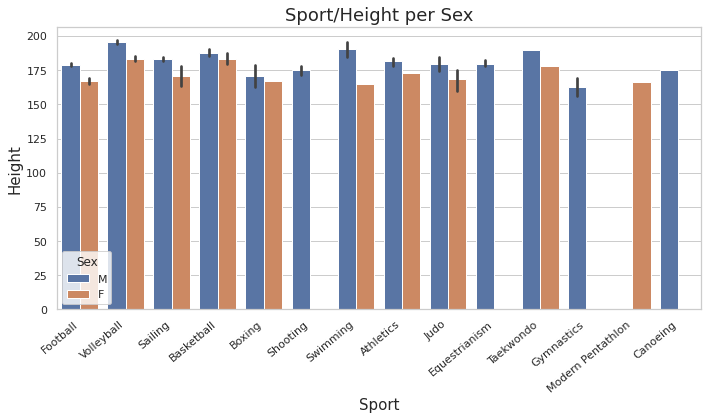

In [4]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.xlabel("Sport", size=15)
plt.ylabel("Height", size=15)
plt.title("Sport/Height per Sex", size=18)
sportHeight = sns.barplot(x='Sport', 
                          y='Height', 
                          data=dfBrazilMedal,
                          hue='Sex',)
sportHeight.set_xticklabels(sportHeight.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()


Agora gere um gráfico semelhante ilustrando o peso dos atletas.

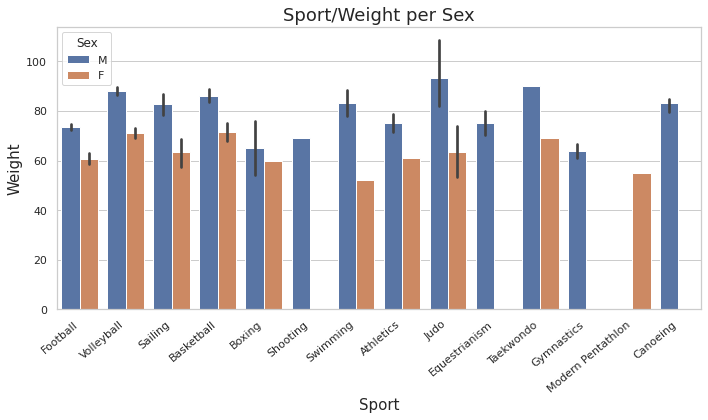

In [5]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,6))
plt.xlabel("Sport", size=15)
plt.ylabel("Weight", size=15)
plt.title("Sport/Weight per Sex", size=18)
sportHeight = sns.barplot(x='Sport', 
                          y='Weight', 
                          data=dfBrazilMedal,
                          hue='Sex',)
sportHeight.set_xticklabels(sportHeight.get_xticklabels(),rotation=40, ha='right')
plt.tight_layout()

Vamos analisar agora as medalhas que nossos atletas trouxeram para casa.

Encontre os maiores medalhistas brasileiros em **total de medalhas**. Em seguida, faça um gráfico de barras empilhadas. No eixo X coloque o nome dos atletas, e no eixo Y coloque o número de medalhas. Utilize as barras empilhadas para mostrar, respectivamente, as medalhas de bronze, prata e ouro de cada atleta.

In [6]:
orderMedal = ['Gold','Silver','Bronze']
c = ['Chocolate','Silver','Gold']
df_medalistName = dfBrazilMedal.groupby(['Name','Medal']).size().unstack('Medal').sort_values(by=orderMedal,ascending=[False, False, False])

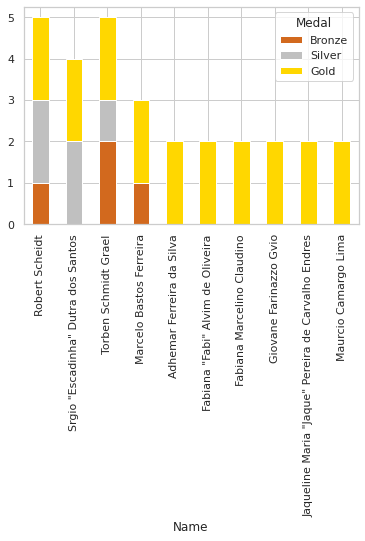

In [7]:
df_medalistName[['Bronze', 'Silver', 'Gold']].head(10).plot(kind='bar', stacked=True,color=c)


Agora gere o mesmo gráfico de barras empilhadas substituindo os nomes dos atletas pelo nome de todos os esportes onde o Brasil já ganhou medalhas.

**DICA:** tome muito cuidado nessa análise: cada **evento esportivo** rende 1 medalha. Por exemplo, quando a equipe de futebol vence, isso é considerado 1 medalha, mesmo tendo cerca de 20 atletas medalhistas na equipe. 

In [94]:
dfMedalSport = dfBrazilMedal.groupby(['Medal','Sport','Event','Year']).size().fillna(0).reset_index()
df_MedalSportAjusted = dfMedalSport.groupby(['Medal','Sport']).size().unstack('Medal').sort_values(by=orderMedal,ascending=[False, False, False]).fillna(0)


df_MedalSportAjusted

Medal,Bronze,Gold,Silver
Sport,,,
Sailing,8.0,7.0,3.0
Athletics,8.0,5.0,3.0
Volleyball,2.0,5.0,3.0
Judo,15.0,4.0,3.0
Football,2.0,1.0,5.0
Swimming,9.0,1.0,4.0
Gymnastics,1.0,1.0,2.0
Shooting,1.0,1.0,2.0
Boxing,3.0,1.0,1.0


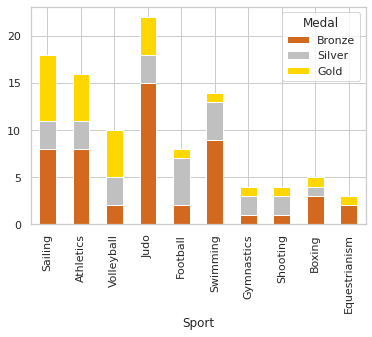

In [29]:
df_MedalSportAjusted[['Bronze', 'Silver', 'Gold']].head(10).plot(kind='bar', stacked=True,color=c)


In [39]:

#sns.set_theme(style="whitegrid")
#plt.figure(figsize=(10,6))
#plt.xlabel("Name", size=15)
#plt.ylabel("Medal", size=15)
#plt.title("Name/Medal", size=18)
# orderMedal = ['Gold','Silver','Bronze']
# c = ['Chocolate','Silver','Gold']
# medalistNameBar = sns.displot(data=df_MedalSportAjusted,
#                               x='Sport', 
#                               hue='Medal',
#                               multiple="stack")
# plt.xticks(rotation=45)
# plt.tight_layout()



Mais um gráfico de barras empilhadas: agora mostre os **eventos esportivos** que renderam medalhas para o Brasil.

Lembrando: cada "categoria" dentro de um esporte é considerado um evento. Por exemplo, dentro de "atletismo", temos uma competição de 100m masculina, uma de 100m feminino, um revezamento 4 x 100m masculino, um revezamento 4 x 100m feminino, uma competição de 400m masculino, uma de 400m feminino, uma maratona masculina, uma maratona feminina, e assim sucessivamente.

In [40]:
dfMedalSport = dfBrazilMedal.groupby(['Medal','Sport','Event','Year']).size().fillna(0).reset_index()
df_MedalEventAjusted = dfMedalSport.groupby(['Medal','Event']).size().unstack('Medal').sort_values(by=orderMedal,ascending=[False, False, False]).fillna(0)

df_MedalEventAjusted

Medal,Bronze,Gold,Silver
Event,,,
Volleyball Men's Volleyball,0.0,3.0,3.0
Athletics Men's Triple Jump,3.0,2.0,1.0
Sailing Mixed One Person Dinghy,0.0,2.0,1.0
Volleyball Women's Volleyball,2.0,2.0,0.0
Football Men's Football,2.0,1.0,3.0
Judo Men's Half-Heavyweight,2.0,1.0,1.0
Sailing Men's Two Person Keelboat,1.0,1.0,1.0
Athletics Men's 800 metres,0.0,1.0,1.0
Gymnastics Men's Rings,0.0,1.0,1.0


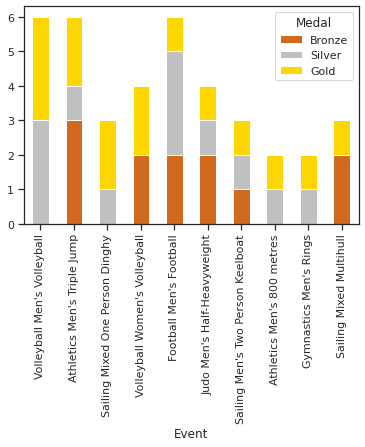

In [45]:
df_MedalEventAjusted[['Bronze', 'Silver', 'Gold']].head(10).plot(kind='bar', stacked=True,color=c)


Utilize um gráfico de distribuição (como um histograma, por exemplo) ilustrando a quantidade total de medalhas do Brasil por esporte.

In [100]:
df_MedalSportNum = dfMedalSport.groupby(['Sport']).count().reset_index().sort_values(by='Medal',ascending=False)
df_SportFilted = df_MedalSportNum[['Sport','Medal']]
df_SportFilted

,Sport,Medal
7,Judo,22
9,Sailing,18
0,Athletics,16
11,Swimming,14
13,Volleyball,10
5,Football,8
1,Basketball,5
2,Boxing,5
6,Gymnastics,4
10,Shooting,4


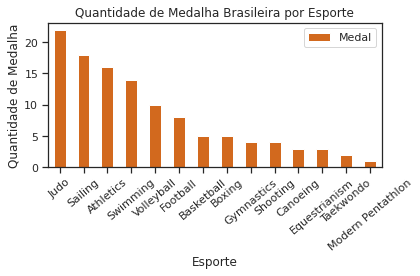

In [113]:

df_SportFilted.plot(kind='bar',color='Chocolate', x='Sport')

plt.title('Quantidade de Medalha Brasileira por Esporte')
plt.xlabel('Esporte')
plt.ylabel('Quantidade de Medalha')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


Repita o procedimento acima, mas com medalhas de ouro.

In [108]:

dfMedalSportGold = dfMedalSport.loc[dfMedalSport.Medal =="Gold"]
df_MedalSportNumGold = dfMedalSportGold.groupby(['Sport']).count().reset_index().sort_values(by='Medal',ascending=False)
df_SportFiltedGold = df_MedalSportNumGold[['Sport','Medal']]
df_SportFiltedGold

,Sport,Medal
6,Sailing,7
0,Athletics,5
9,Volleyball,5
5,Judo,4
1,Boxing,1
2,Equestrianism,1
3,Football,1
4,Gymnastics,1
7,Shooting,1
8,Swimming,1


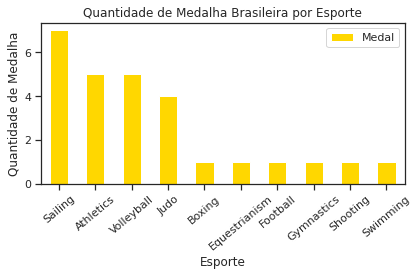

In [112]:

df_SportFiltedGold.plot(kind='bar',color='Gold', x='Sport')

plt.title('Quantidade de Medalha Brasileira por Esporte')
plt.xlabel('Esporte')
plt.ylabel('Quantidade de Medalha')
plt.xticks(rotation=40)
plt.tight_layout()
plt.show()


Agora faça um gráfico de setores (pizza) mostrando a distribuição de medalhas de ouro do Brasil por esporte.

In [34]:
dfBraM = dfMedalSportGold.groupby(['Sport','Medal']).size().reset_index(name ='Num')
dfBraM.drop('Medal', axis='columns', inplace=True)
pizza = px.pie(dfBraM, values='Num', names='Sport', title='Medalhas de ouro por esporte')
pizza.show()

Para finalizar a história do Brasil, vamos ver a série temporal de medalhas brasileiras. Crie um gráfico de linhas contendo 3 linhas: ouro, prata e bronze. Coloque no eixo X a edição da olimpíada (em ordem cronológica) e no eixo Y o total de medalhas de cada tipo.

In [35]:
#df = dfBrazilMedal.groupby(['Medal','Year','Event']).size().sort_values(ascending=False).reset_index(name='Num')
#df.drop('Num', axis='columns', inplace=True)
#df.drop('Event', axis='columns', inplace=True)

brazilian_MedalYear = dfBrazilMedal.groupby(['Year','Medal','Sport']).size().sort_values(ascending=False).reset_index(name="Num")
df_brazilianMedalYear = brazilian_MedalYear.groupby(['Year','Medal']).size().sort_values(ascending=False).reset_index(name="Num")
#brazilMedal = brazilian_MedalYear.pivot_table(brazilian_MedalYear,index='Year',columns='Medal',fill_value=0)
#brazilMedal.columns = brazilMedal.columns.droplevel(0)
#brazilMedal.reset_index(inplace=True)
#orderMedal = ['Gold','Silver','Bronze']

df_brazilianMedalYear



,Year,Medal,Num
0,1996,Bronze,7
1,2016,Gold,6
2,2008,Bronze,6
3,2016,Bronze,5
4,1984,Silver,5
5,2012,Bronze,5
6,2000,Bronze,5
7,2012,Silver,4
8,2016,Silver,3
9,2000,Silver,3


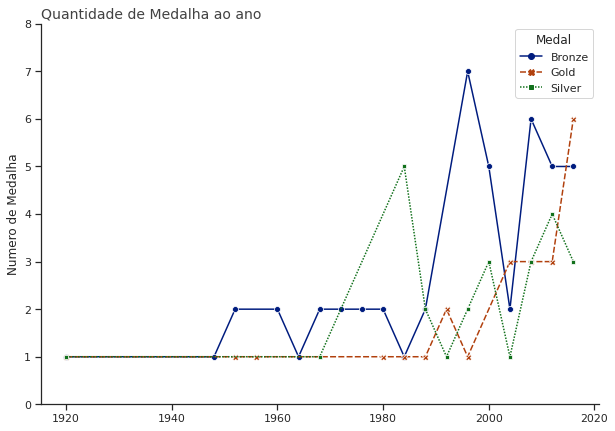

In [36]:
sns.set_style('ticks');
sns.set_palette('dark');
plt.figure(figsize=(10,7))


ax = sns.lineplot(data=df_brazilianMedalYear, x='Year', y='Num', 
                  hue='Medal', style='Medal', markers=True);

ax.set_xlabel('');
ax.set_ylabel('Numero de Medalha');

ax.set_yticks(ax.get_yticks());
#ax.set_yticklabels(['{:,.1%}'.format(x) for x in ax.get_yticks()]);

cor_hexa='#424242'

ax.set_title('Quantidade de Medalha ao ano', 
             loc='left', fontsize=14, color=cor_hexa);

sns.despine(left=False, bottom=False);

## 2. O mundo nos jogos de verão

Filtre o DataFrame original para conter apenas informações sobre os **medalhistas** de todos os países **nos jogos de verão**.



Utilizando subplots, crie 2 boxplots ilustrando a quantidade de medalhas por atleta. Em um deles, considere todos os atletas. No segundo, experimente remover os *outliers*.

Descubra o total de medalhas de ouro de cada país (lembrando-se da restrição dos eventos esportivos, para não contabilizar múltiplas medalhas em esportes de equipe!).

Agora pegue os 10 países com mais medalhas e crie uma categoria "Outros" para o restante dos países. Exiba um gráfico de pizza mostrando a distribuição de medalhas de ouro entre essas 11 "equipes".

Repita o procedimento acima, mas mostrando o total de medalhas ao invés de apenas medalhas de ouro.

Crie um gráfico de barras empilhadas, com cada país das categorias acima no eixo X, total de medalhas no eixo Y, e barras empilhadas representando as medalhas de ouro, prata e bronze de cada país.

Crie um gráfico de distribuição (por exemplo, um histograma) mostrando a quantidade total de medalhas por país.

**Desafio bônus:** Crie uma visualização da quantidade de medalhas de ouro e outra para quantidade total de medalhas por país, ambas utilizando mapas. Utilize o tipo de mapa que achar mais adequado.

## 3. Brasil vs Mundo

Faça um gráfico de barras comparando os maiores medalhistas brasileiros com os maiores medalhistas do mundo em suas respectivas categorias.

Represente o esporte no eixo X, a quantidade de medalhas no eixo Y, coloque barras lado-a-lado representando os diferentes atletas de uma mesma modalidade e empilhe as medalhas de ouro, prata e bronze de cada atleta.

Repita o procedimento acima, mas ao invés de atletas, considere o(s) esporte(s) onde o Brasil mais possui medalha comparando-os com o país com maior quantidade de medalhas naquele esporte.

Para finalizar, repita os gráficos que você gerou com os 10 países com mais medalhas, mas remova o Brasil da categoria "Outros" e mostre-o também no gráfico.